In [1]:
from Bio import Entrez, SeqIO
Entrez.email = "" 
handle = Entrez.efetch(db="nucleotide", id="MN908947", rettype="gb", retmode="text")
recs = list(SeqIO.parse(handle, 'gb'))
handle.close()

In [2]:
recs

[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])]

In [3]:
covid_dna = recs[0].seq

In [4]:
covid_dna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [5]:
print(f'The genome of Covid-19 consists of {len(covid_dna)} nucleotides.')

The genome of Covid-19 consists of 29903 nucleotides.


In [6]:
# molecular weight
from Bio.SeqUtils import molecular_weight
molecular_weight(covid_dna)

9241219.214400413

In [7]:
# GC content - higher GC content implies more stable molecule due to G and C forming triple hydrogen bonds
from Bio.SeqUtils import GC
GC(covid_dna)

37.97277865097148

In [8]:
count_nucleotides = {
    'A': covid_dna.count('A'),
    'T': covid_dna.count('T'),
    'C': covid_dna.count('C'),
    'G': covid_dna.count('G')
}

In [9]:
count_nucleotides

{'A': 8954, 'T': 9594, 'C': 5492, 'G': 5863}

Text(0.5, 1.0, 'Nucleotide Frequency')

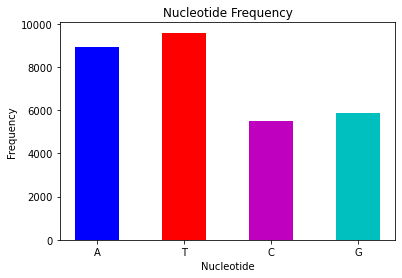

In [10]:
import matplotlib.pyplot as plt
width = 0.5
plt.bar(count_nucleotides.keys(), count_nucleotides.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequency')

In [11]:
covid_mrna = covid_dna.transcribe()
covid_mrna

Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA')

In [12]:
covid_aa = covid_mrna.translate()
covid_aa

/opt/anaconda3/lib/python3.8/site-packages/Bio/Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

In [13]:
#most common amino acids
from collections import Counter
common_amino = Counter(covid_aa)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

Text(0.5, 1.0, 'Protein Sequence Frequency')

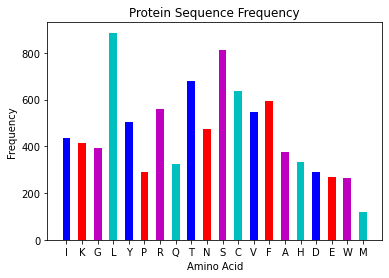

In [14]:
#deleting the  '*' amino acid
#plotting the frequency of protien sequence

del common_amino['*']

width = 0.5
plt.bar(common_amino.keys(), common_amino.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Amino Acid')
plt.ylabel('Frequency')
plt.title('Protein Sequence Frequency')

In [15]:
print(f"Covid-19's genome has {sum(common_amino.values())} amino acids")

Covid-19's genome has 9193 amino acids


In [16]:
proteins = covid_aa.split('*')

In [17]:
proteins[:5]

[Seq('IKGLYLPR'),
 Seq('QTNQLSISCRSVL'),
 Seq('TNFKICVAVTRLHA'),
 Seq('CTHAV'),
 Seq('LITNYCR')]

In [18]:
print(f'We have {len(proteins)} amino acids in the covid-19 genome')

We have 775 amino acids in the covid-19 genome


In [19]:
for protein in proteins:
    if len(protein) < 20:
        proteins.remove(protein)

In [20]:
print(f'We have {len(proteins)} proteins with more than 20 amino acids in the covid-19 genome')

We have 409 proteins with more than 20 amino acids in the covid-19 genome


In [21]:
top_5_proteins = sorted(proteins, key = len)

In [22]:
top_5_proteins[-1]

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [23]:
len(top_5_proteins[-1])

2701

In [24]:
#saving the protien sequence in a fasta format file

with open("protein_seq.fasta", "w") as file:
    file.write(f">covid protein\n{top_5_proteins[-1]}")

In [25]:
#importing the file containing protien sequence

from Bio import SeqIO
for sequence in SeqIO.parse('protein_seq.fasta', "fasta"):
    print(sequence.id)
    print(sequence.seq)

covid
CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACIRRPFLCCKCCYDHVISTSHKLVLSVNPYVCNAPGCDVTDVTQLYL

In [26]:
sequences = list(sequence.seq)
dataset = {}

# loop through sequences and split into individual nucleotides
for i, seq in enumerate(sequence.seq):
    
    # splited into nucleotides, removed tab characters
    nucleotides = list(seq)
    nucleotides = [x for x in nucleotides if x != '\t']
    
    
    # add to dataset
    dataset[i] = nucleotides
    
print(dataset)

{0: ['C'], 1: ['T'], 2: ['I'], 3: ['V'], 4: ['F'], 5: ['K'], 6: ['R'], 7: ['V'], 8: ['C'], 9: ['G'], 10: ['V'], 11: ['S'], 12: ['A'], 13: ['A'], 14: ['R'], 15: ['L'], 16: ['T'], 17: ['P'], 18: ['C'], 19: ['G'], 20: ['T'], 21: ['G'], 22: ['T'], 23: ['S'], 24: ['T'], 25: ['D'], 26: ['V'], 27: ['V'], 28: ['Y'], 29: ['R'], 30: ['A'], 31: ['F'], 32: ['D'], 33: ['I'], 34: ['Y'], 35: ['N'], 36: ['D'], 37: ['K'], 38: ['V'], 39: ['A'], 40: ['G'], 41: ['F'], 42: ['A'], 43: ['K'], 44: ['F'], 45: ['L'], 46: ['K'], 47: ['T'], 48: ['N'], 49: ['C'], 50: ['C'], 51: ['R'], 52: ['F'], 53: ['Q'], 54: ['E'], 55: ['K'], 56: ['D'], 57: ['E'], 58: ['D'], 59: ['D'], 60: ['N'], 61: ['L'], 62: ['I'], 63: ['D'], 64: ['S'], 65: ['Y'], 66: ['F'], 67: ['V'], 68: ['V'], 69: ['K'], 70: ['R'], 71: ['H'], 72: ['T'], 73: ['F'], 74: ['S'], 75: ['N'], 76: ['Y'], 77: ['Q'], 78: ['H'], 79: ['E'], 80: ['E'], 81: ['T'], 82: ['I'], 83: ['Y'], 84: ['N'], 85: ['L'], 86: ['L'], 87: ['K'], 88: ['D'], 89: ['C'], 90: ['P'], 91: ['A'

In [27]:
import numpy as np
import pandas as pd

In [28]:
df = pd.DataFrame(dataset)
print(df)

  0    1    2    3    4    5    6    7    8    9     ... 2691 2692 2693 2694  \
0    C    T    I    V    F    K    R    V    C    G  ...    V    I    S    S   

  2695 2696 2697 2698 2699 2700  
0    D    V    L    V    N    N  

[1 rows x 2701 columns]


In [29]:
#dataframe transpose
dft = df.transpose()
print(dft.iloc[:5])

   0
0  C
1  T
2  I
3  V
4  F


In [30]:
dft.describe()

,0
count,2701
unique,20
top,L
freq,233


In [31]:
series = []
for name in dft.columns:
    series.append(dft[name].value_counts())
    
info = pd.DataFrame(series)
details = info.transpose()
print(details)

     0
L  233
V  229
T  183
A  179
D  178
S  162
K  159
N  151
G  149
F  143
Y  140
I  129
R  113
P  110
E  101
C   89
Q   88
H   70
M   63
W   32


In [32]:
#converting string values to numerical values as ML algorithm runs on the numerical value
numerical_dft = pd.get_dummies(dft)
numerical_dft.iloc[:5]

,0_A,0_C,0_D,0_E,0_F,0_G,0_H,0_I,0_K,0_L,0_M,0_N,0_P,0_Q,0_R,0_S,0_T,0_V,0_W,0_Y
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn import model_selection

#Creating X and Y datasets for training
X = np.array(numerical_dft)
y = np.array(numerical_dft)


# defined seed for reproducibility
seed = 1

# splitinng data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=seed)


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

scoring = 'accuracy'

#knn classifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [35]:
#knn model
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        49
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        34
           8       1.00      1.00      1.00        29
           9       1.00      1.00      1.00        60
          10       1.00      1.00      1.00        15
          11       1.00      1.00      1.00        34
          12       1.00      1.00      1.00        27
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        45
          16       1.00      1.00      1.00        46
          17       1.00